In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import re

In [6]:
from konlpy.tag import Mecab

m = Mecab(dicpath = 'C:/mecab/mecab-ko-dic')
m.nouns('A타입도 좋고, PD충전 되는 것도 좋아요. C타입 여러개 있어서 좋습니다, 110V')

['A타입', 'PD충전', '것', 'C타입', '개']

In [7]:
product = pd.read_csv("C:/Users/shopperhouse/Code/GEN_Ailee\product.csv", index_col = 0)
product.reset_index(drop = True)

,add_rule_based_split_review
0,금액 차이 얼마 안 나는데 기능은 더 좋아요
1,콤팩트한 디자인과 실용성에 높은 점수 주었습니다
2,전면 스크래치가 많아서 아쉽네요
3,말 그대로 멀티 어댑터에요 해외여행 필수 탬
4,작아서 휴대도 굿굿
...,...
7780,가볍고 휴대하기 좋아요
7781,C 타입 충전이 없어서 구매를 망설이긴 했지만 좀 큰 변압기는 쳐져서 충전이 잘 안...
7782,요 사이즈가 딱이네요
7783,켔써요 노란색이 너무 귀엽군요


In [8]:
def upper_text(text):
    text = text.upper()
    return text

In [9]:
product['add_rule_based_split_review'] = product['add_rule_based_split_review'].apply(upper_text)

In [10]:
def replace_text(text):
  text = str(text)
  text = text.replace('ㅎ','')
  text = text.replace('ㅋ','')
  text = text.replace('루♡','')
  text = text.replace('♡','')
  text = text.replace('굳','굿')
  text = text.replace('ㅜ','')
  text = text.replace('욥','요')
  text = text.replace('ㅅ','')
  text = text.replace('오ㅡ','')
  text = text.replace('ㅡ','')
  text = text.replace('굿입니다','굿')
  text = text.replace('아이디어템','아이디어 탬')
  text = text.replace(':D','')
  text = text.replace('핳핳','')
  text = text.replace('효오','')
  text = text.replace('☆','')
  text = text.replace('ᄒ','')
  text = text.replace('goood','굿')
  text = text.replace('굿국국숙','굿굿굿')
  text = text.replace('USC','USB') 
  text = text.replace('A S','AS')
  text = text.replace('ᄆ','')
  text = text.replace('ᅳᄋ ᄋ','')
  text = text.replace('배슝','배송')
  text = text.replace('ᅲ','')
  text = text.replace(' ♥','')
  text = text.replace('ᄏ','')
  text = text.replace('강 추','강추')
  text = text.replace('★','')
  text = text.replace('■','')
  text = text.replace('C 타입','C타입')
  text = text.replace('씨타입','C타입')
  text = text.replace('A 타입','A타입')
  text = text.replace('에이타입','A타입')
  text = text.replace('PD 충전','PD충전')
  text = text.replace('급 속','급속')
  text = text.replace('포드','포트')
  text = text.replace('포드만','포트')
  text = text.replace('포드리','포트')
  text = text.replace('핸폰','핸드폰')
  # 1개짜리는 제외
  return text

In [11]:
product['add_rule_based_split_review'] = product['add_rule_based_split_review'].apply(replace_text)

In [12]:
# def clean_text(text):
#     if isinstance(text, str):
#         return re.sub(r'[-=+,#/\?:^$.@*"※~&%ㆍ!』\\‘·|\(\)\[\]\<\>`\'…\"\“’]', '', text)
#     else:
#         return ""

In [13]:
# product['add_rule_based_split_review'] = product['add_rule_based_split_review'].apply(clean_text)

In [14]:
def preprocess_reviews(reviews, stopwords_path, additional_stopwords=[]):
    # 불용어 파일 로드
    with open(stopwords_path, encoding='utf-8') as file:
        stopwords = file.read().splitlines()
    
    # 추가 불용어 합치기
    stopwords.extend(additional_stopwords)

    # 리뷰 전처리
    clean_sent = []
    for review in reviews:
        clean = re.sub(r'[-=+,#/\?:^$.@*"※~&%ㆍ!』\\‘·|\(\)\[\]\<\>`\'…\"\“’]', '', review)
        clean = clean.replace('\n', '').replace('\r', '')  # 줄바꿈 문자 제거
        clean_sent.append(clean)

    m = Mecab(dicpath = 'C:/mecab/mecab-ko-dic')
    
    word_list = []
    for sentences in clean_sent:
        # 정규화
        # sentences = m.normalize(sentences)
        # 토큰화
        # tokens = sentences.split()
        tokens = m.nouns(sentences)
        # tokens = okt.nouns(sentences)
        # 불용어 제거
        tokens = [token for token in tokens if token not in stopwords]
        # tokens = [a for a in s len(a) > 1] # 한글자 이상 단어 제거
        word_list.append(tokens)
    
    return word_list


In [15]:
# import gensim
# import matplotlib.pyplot as plt
# from gensim import corpora, models
# from gensim.models import CoherenceModel
# from pprint import pprint
# import pyLDAvis
# import pyLDAvis.gensim_models as gensimvis

# def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
#     coherence_values = []
#     model_list = []
    
#     for num_topics in range(start, limit, step):
#         model = gensim.models.LdaMulticore(corpus=corpus, num_topics=num_topics, id2word=dictionary, passes=2, workers=4)
#         model_list.append(model)
#         coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
#         coherence_values.append(coherencemodel.get_coherence())
    
#     return model_list, coherence_values

# def lda_modeling(reviews, stopwords_path, additional_stopwords=[], limit=10, start=2, step=1):
#     preprocessed_reviews = preprocess_reviews(reviews, stopwords_path, additional_stopwords)

#     id2word = corpora.Dictionary(preprocessed_reviews)
#     id2word.filter_extremes(no_below=10) # 조절
#     corpus = [id2word.doc2bow(text) for text in preprocessed_reviews]

#     tf_idf = models.TfidfModel(corpus)
#     corpus_tfidf = tf_idf[corpus]

#     model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus_tfidf, texts=preprocessed_reviews, limit=limit, start=start, step=step)

#     x = range(start, limit, step)
#     plt.plot(x, coherence_values)
#     plt.xlabel('Num Topics')
#     plt.ylabel('Coherence score')
#     plt.legend(('coherence_values'), loc='best')
#     plt.show()

#     # 최적의 모델 선택
#     optimal_model = model_list[coherence_values.index(max(coherence_values))]
#     model_topics = optimal_model.show_topics(formatted=False)
    
#     return optimal_model, model_topics

# # def visualize_lda_model(optimal_model, corpus_tfidf, id2word):
# #     pyLDAvis.enable_notebook()
# #     vis_data = gensimvis.prepare(optimal_model, corpus_tfidf, id2word)
# #     pyLDAvis.display(vis_data)



In [16]:
reviews = product['add_rule_based_split_review']  # 리뷰 데이터
stopwords_path = "C:/Users/shopperhouse/Downloads/stopwords-ko.txt"
additional_stopwords = ['의','가','이','은','들','는','과','서', '있다','자다','라고', '이라', '되다', '제', 'ㅎ', 'ㅋㅋ',
                        '도','를','으로','자','에','와','한','하다','등' ,'및', '것', '에서', '거', '면', '오다', '용', '요',
                        '잘','다','수','개','달', '게요', '전', '변','이거','시', '하다', '자다', '있다', '도', '이', '에', '써다', '때', '너무', '가', '것' ,'에서', '거',
                        '서', '수', '요','오다','아직','으로','을','은','아주','안','를','로','되어다', '다','하고',
                        '이다','않다','받다','고','는','게','이번','만','전','돼다','까지','용','라','번','달','시','못',
                        ]

preprocessed_reviews = preprocess_reviews(reviews, stopwords_path, additional_stopwords)
# print(preprocessed_reviews)

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.preprocessing import normalize

from sklearn.cluster import KMeans
from soyclustering import SphericalKMeans
# from yellowbrick.cluster import KElbowVisualizer

In [18]:
# 토큰화된 단어들이 ''으로 각각 구분되지 않고 하나의 문장처럼 연결이 되어야 함
word_list = []
for words in preprocessed_reviews:
    words = ' '.join(words) # join은 모든 문자열을 합치는 함수(공백을 기준으로 단어를 합침)
    word_list.append(words)

# remove_stopwods는 토큰화된 단어들이 ''으로 분리되어 있음

In [19]:
# # spherical k-mean 사용을 위한 vector화 진행

# # tfidf_vectorizer = TfidfVectorizer()
# # tfidf_matrix_mecab = tfidf_vectorizer.fit_transform(word_list)

# tfidf_vectorizer = TfidfVectorizer(analyzer='word', min_df = 3, ngram_range=(1,3)) #min_df = 5, ngram_range=(1,5)
# tfidf_matrix_mecab = tfidf_vectorizer.fit_transform(word_list)

In [20]:
from sklearn.feature_extraction.text import CountVectorizer

count_vec = CountVectorizer(analyzer='word', min_df = 3, ngram_range = (1,3))
count_word = count_vec.fit_transform(word_list)

In [21]:
count_word

<7785x1814 sparse matrix of type '<class 'numpy.int64'>'
	with 29522 stored elements in Compressed Sparse Row format>

In [22]:
# import pickle

# # 희소 행렬을 pickle 파일로 저장
# with open('C:/Users/shopperhouse/Code/GEN_Ailee/count_word.pkl', 'wb') as f:
#     pickle.dump(count_word, f)

NameError: name 'np' is not defined

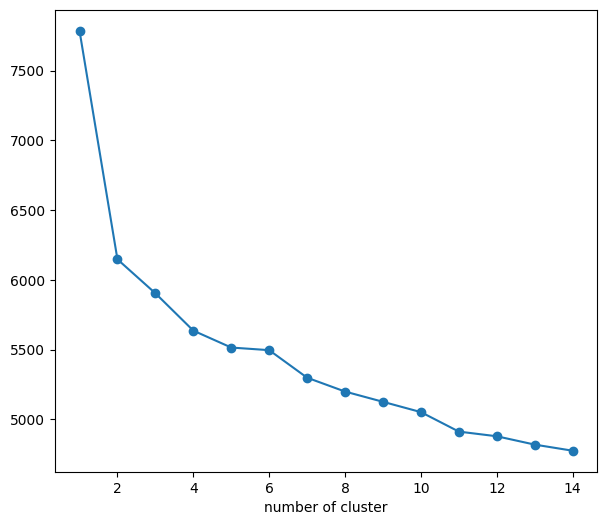

In [23]:
x = normalize(count_word)
# L2 정규화로 vector의 합을 정규화해서 centroid를 unit vector화

def elbow(normalizedData, Clusters):
    sse = []
    for i in range(1,Clusters):
        spherical_kmeans = SphericalKMeans(n_clusters=i, init='k-means++', random_state=0) 
        spherical_kmeans.fit(normalizedData)
        sse.append(spherical_kmeans.inertia_)
    plt.figure(figsize=(7,6))
    plt.plot(range(1,Clusters), sse, marker='o')
    plt.xlabel('number of cluster')
    plt.xticks(np.arange(0,Clusters,2))
    plt.ylabel('SSE')
    plt.title('Elbow Method - number of cluster : '+str(Clusters))
    plt.show()
    
elbow(x, 15)

In [33]:
## SphericalKMeans 모델 설정
spherical_kmeans = SphericalKMeans(
    n_clusters=3,
    max_iter=10,
    verbose=1,
    init='similar_cut',
    # minimum_df_factor=0.05,
    # sparsity='minimum_df'
)

# 클러스터링 수행 및 라벨 얻기
x = normalize(count_word)
models = spherical_kmeans.fit(x)
centers = spherical_kmeans.cluster_centers_

initialization_time=0.007813 sec, sparsity=0.00239
n_iter=1, changed=712, inertia=7387.858, iter_time=0.060 sec, sparsity=0.456
n_iter=2, changed=573, inertia=6178.242, iter_time=0.041 sec, sparsity=0.506
n_iter=3, changed=571, inertia=6007.353, iter_time=0.031 sec, sparsity=0.559
n_iter=4, changed=194, inertia=5987.977, iter_time=0.037 sec, sparsity=0.568
n_iter=5, changed=77, inertia=5986.024, iter_time=0.042 sec, sparsity=0.569
n_iter=6, changed=49, inertia=5985.175, iter_time=0.047 sec, sparsity=0.573
n_iter=7, changed=84, inertia=5984.637, iter_time=0.055 sec, sparsity=0.574
n_iter=8, changed=124, inertia=5979.238, iter_time=0.050 sec, sparsity=0.577
n_iter=9, changed=90, inertia=5974.972, iter_time=0.024 sec, sparsity=0.578
n_iter=10, changed=103, inertia=5973.605, iter_time=0.028 sec, sparsity=0.581


In [34]:
from sklearn.metrics import silhouette_score

labels = models.labels_
silhouette_score = silhouette_score(x, labels, metric='cosine')
silhouette_score

0.04401501810240692

In [35]:
## spherical k-means 키워드

from soyclustering import proportion_keywords

vocabs = [vocab for vocab, idx in sorted(count_vec .vocabulary_.items(), key=lambda count_word:count_word[1])]
centers = spherical_kmeans.cluster_centers_

keywords = proportion_keywords(centers, labels=labels, index2word=vocabs, topk=30, candidates_topk=100)


In [38]:
keywords

[[('충전 가능', 1.0),
  ('사용 충전', 1.0),
  ('배터리', 0.9802459147841979),
  ('보조', 0.9771840354473533),
  ('보조 배터리', 0.9758907836059052),
  ('케이스 여행', 0.9741110463744092),
  ('배터리 충전', 0.964397297315225),
  ('워치', 0.9635153490654319),
  ('기기 충전', 0.9559108995574236),
  ('고속 충전', 0.9531981662388654),
  ('가방', 0.9491851881527023),
  ('충전', 0.9445791105386091),
  ('충전 속도', 0.9328826575378871),
  ('보관 케이스', 0.9294655662679466),
  ('핸드폰', 0.9266945458062602),
  ('충전 포트', 0.9181226608757801),
  ('케이스 보관', 0.9162405062290565),
  ('고속', 0.9043146703905741),
  ('휴대폰', 0.9042495343133565),
  ('케이스', 0.9000582821334633),
  ('보관', 0.8997480549913617),
  ('다양', 0.88176841328263),
  ('사이즈', 0.8701459739803827),
  ('초고속 충전', 0.8671302673032625),
  ('덕분', 0.8669103434325997),
  ('연결', 0.8658815703403959),
  ('동시 충전', 0.863866404655525),
  ('부분', 0.84878281857983),
  ('속도', 0.8432828300132611),
  ('코드', 0.8425170755076765)],
 [('디자인 고급', 1.0),
  ('디자인 기능', 1.0),
  ('디자인 사용', 1.0),
  ('배송 디자인', 1.0),
  ('디자인 실

In [45]:
cluster_indices = []
for cluster_idx, keyword in enumerate(keywords):
    keyword = ' '.join([w for w,_ in keyword])
    print('cluster#{} : {}'.format(cluster_idx, keyword))
    cluster_indices.append(cluster_idx)

cluster#0 : 충전 가능 사용 충전 배터리 보조 보조 배터리 케이스 여행 배터리 충전 워치 기기 충전 고속 충전 가방 충전 충전 속도 보관 케이스 핸드폰 충전 포트 케이스 보관 고속 휴대폰 케이스 보관 다양 사이즈 초고속 충전 덕분 연결 동시 충전 부분 속도 코드
cluster#1 : 디자인 고급 디자인 기능 디자인 사용 배송 디자인 디자인 실용 디자인 성능 배송 품질 디자인 파우 디자인 여행 콤팩트 디자인 디자인 포트 품질 만족 색상 디자인 제품 디자인 디자인 심플 디자인 배송 디자인 우치 배송 성능 디자인 타입 디자인 휴대 구성 디자인 디자인 크기 디자인 견고 가격 디자인 디자인 내구 어댑터 디자인 디자인 디자인 케이스 사용 디자인 디자인 마음
cluster#2 : 제품 구매 후회 해외 유용 해외 출장 필요 구매 구매 지인 추가 구매 어댑터 구매 노랑 친절 제품 다이소 출장 퀄리티 여행 구매 해외 상품 비교 차이 이전 고장 불량 퓨즈 흰색 선물 고민 필요 어댑터 필요 검색


In [40]:
df_dict = {'TokenizedTitDesc':word_list,  
           'TitDesc':product['add_rule_based_split_review']}
doc_df = pd.DataFrame(df_dict)

topic_df = doc_df 
print(doc_df.info())
doc_df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 7785 entries, 3 to 17709
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   TokenizedTitDesc  7785 non-null   object
 1   TitDesc           7785 non-null   object
dtypes: object(2)
memory usage: 182.5+ KB
None


,TokenizedTitDesc,TitDesc
3,금액 차이 기능,금액 차이 얼마 안 나는데 기능은 더 좋아요
4,콤팩트 디자인 실용,콤팩트한 디자인과 실용성에 높은 점수 주었습니다
8,전면 스크래치,전면 스크래치가 많아서 아쉽네요
18,말 멀티 어댑터 해외여행 필수 탬,말 그대로 멀티 어댑터에요 해외여행 필수 탬
22,휴대 굿 굿,작아서 휴대도 굿굿


In [46]:
# 군집화한 레이블값들을 document_df 에 추가하기
doc_df['cluster_label'] = labels
df_clus = doc_df.sort_values(by=['cluster_label'])
df_clus


,TokenizedTitDesc,TitDesc,cluster_label
8947,여행 코드,여행 갈 때 만능인 코드,0
10818,콤팩트 사용 편리,콤팩트하고 사용이 편리합니다,0
10815,밑 포트 이용 충전,밑에 포트만 이용해서 충전해도 돼서 아주 편하네요,0
10812,뉴욕 여행 사용 충전,이번 뉴욕 여행 때 사용했는데 아주 편하고 간단하며 충전이 빠릅니다,0
10810,사용 케이스 관리,아직 사용 전이지만 케이스도 있어서 관리하기 좋습니다,0
...,...,...,...
4384,세계 호환,세계 어딜까도 호환이 되어서 좋네요,2
12181,다이슨 평,다이슨은 안된다는 평이 많아서 애초에 안 가져갔어요,2
4370,일본 여행 구매 국내 콘센트 제품 충전,일본 여행 가서 쓰려고 구매했지만 국내에서 11V 짜리 콘센트 가진 제품 충전할 때...,2
4344,제품 무게 여행 준비,제품은 좀 무게가 있고 여행 가서 쓰려고 준비했어요,2


In [49]:
df_clus.to_csv('C:/Users/shopperhouse/Code/GEN_Ailee/spherical_k_means_entity.csv', encoding='utf-8-sig')

In [43]:
def get_cluster_details(cluster_model, cluster_data, feature_names, cluster_num, top_n_features=10):
    cluster_details = {}
    # 각 클러스터 레이블별 feature들의 center값들 내림차순으로 정렬 후의 인덱스를 반환
    center_feature_idx = cluster_model.cluster_centers_.argsort()[:,::-1]

    # 개별 클러스터 레이블별로
    for cluster_num in range(cluster_num):
        # 개별 클러스터별 정보를 담을 empty dict할당
        cluster_details[cluster_num] = {}
        cluster_details[cluster_num]['cluster'] = cluster_num

        # 각 feature별 center값들 정렬한 인덱스 중 상위 10개만 추출
        top_ftr_idx = center_feature_idx[cluster_num, : top_n_features]
        top_ftr = [feature_names[idx] for idx in top_ftr_idx]
        # top_ftr_idx를 활용해서 상위 10개 feature들의 center값들 반환
        # 반환하게 되면 array이기 떄문에 리스트로바꾸기
        top_ftr_val = cluster_model.cluster_centers_[cluster_num, top_ftr_idx].tolist()

        # cluster_details 딕셔너리에다가 개별 군집 정보 넣어주기
        cluster_details[cluster_num]['top_features'] = top_ftr
        cluster_details[cluster_num]['top_featrues_value'] = top_ftr_val
        
        # 해당 cluster_num으로 분류된 파일명(문서들) 넣어주기
        filenames = doc_df[doc_df['cluster_label']==cluster_num]['TitDesc']
        
        # filenames가 df으로 반환되기 떄문에 값들만 출력해서 array->list로 변환
        filenames = filenames.values.tolist()
        cluster_details[cluster_num]['TitDesc'] = filenames

    return cluster_details

def print_cluster_details(cluster_details):
    for cluster_num, cluster_detail in cluster_details.items():
        print(f"#####Cluster Num: {cluster_num}")
        print()
        print("상위 10개 feature단어들:\n", cluster_detail['top_features'])
        print()
        print(f"Cluster {cluster_num}으로 분류된 게시물:\n{cluster_detail['TitDesc'][:10]}")
        print('-'*20)


In [47]:
feature_names = count_vec.get_feature_names_out()
cluster_details = get_cluster_details(cluster_model=spherical_kmeans,
                                     cluster_data=df_clus,
                                     feature_names=feature_names,
                                     cluster_num=3,
                                     top_n_features=10)
print_cluster_details(cluster_details)

#####Cluster Num: 0

상위 10개 feature단어들:
 ['충전', '케이스', '사용', '여행', '포트', '파우', '어댑터', '콘센트', '만족', '보관']

Cluster 0으로 분류된 게시물:
['말 그대로 멀티 어댑터에요 해외여행 필수 탬', '작아서 휴대도 굿굿', 'USB형이 사용하기가 훨씬 편해서 좋았어요', '나라마다 전압이 틀려서 그런지 충전이 잘 되는 나라도 있고 느리게 충전되는 경우도 있고 충전 코드가 헐거워 불편한 호텔도 있어서 파우치 같은 걸로 밑에 받쳐 사용하심 될 거 같아요', 'USB 두 개 충전 시엔 충전 속도가 많  이 느려지지만 주로 잘 때만 사용해서 큰 불편함은 없었네요', ' 호환되는 나라가 많아서 좋아요', '마감이 조금 아쉬우나 싼 맛에 써요', '근데 하나는 바로 망가졌어요', 'USB 단자가 있어 유용할 듯 불량 없이 잘 사용되면 좋겠어요', ' 물건도 꼼꼼하게 잘 왔어요']
--------------------
#####Cluster Num: 1

상위 10개 feature단어들:
 ['디자인', '배송', '품질', '마음', '사용', '케이스', '만족', '디자인 케이스', '실용', '여행']

Cluster 1으로 분류된 게시물:
['콤팩트한 디자인과 실용성에 높은 점수 주었습니다', '전면 스크래치가 많아서 아쉽네요', '빠른 배송 좋은 품질 감사합니다', '기대 이상으로 꼼꼼하게 배송 오고 튼튼해 보여요', '품질 좋습니다', '품질이 조금만 더 좋았으면 좋겠네요', '상품 품질 및 마감 등 실물이 더 좋네요', '동일 스펙 멀티 어댑터 중 디자인이 가장 예뻐요', '무엇보다 다 충전기보다 간지가 나서 좋았고 깔끔한 디자인에 묵직함도 한몫했다고 생각합니다', '배송도 금방 왔고 용이해요']
--------------------
#####Cluster Num: 2

상위 10개 feature단어들:
 ['구매', '제품', '해외', '필요', '어댑터', '여행', '멀티